<a href="https://www.kaggle.com/code/ellecoding/eda-book-trends-in-india-2024?scriptVersionId=171522028" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Genre_df.csv
/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Books_df.csv
/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Sub_Genre_df.csv
/kaggle/input/author-nationalities-amazonbookdf/author_nationalities.csv


# EDA: Book Trends in India (2024)
Amazon has over 100 million registered customers in India. In this project, I will do a quick EDA to explore books trends in India as of March, 2024. We'll dig into top ratings, genres, authors, and more. Lastly, I'll make an infographic to capture key data, and create an interactive dashboard on Tableau. Let's get started!

In [3]:
# Load dataset
file_path = '/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Books_df.csv'
books_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
books_df.head()

,Unnamed: 0,Title,Author,Main Genre,Sub Genre,Type,Price,Rating,No. of People rated,URLs
0,0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹169.00,4.4,19923.0,https://www.amazon.in/Complete-Novels-Sherlock...
1,1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹99.00,4.5,7686.0,https://www.amazon.in/Black-Holes-Lectures-Ste...
2,2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,₹175.75,4.6,50016.0,https://www.amazon.in/Kite-Runner-Khaled-Hosse...
3,3,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹389.00,4.6,32040.0,https://www.amazon.in/Greenlights-Raucous-stor...
4,4,The Science of Storytelling: Why Stories Make ...,Will Storr,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹348.16,4.5,1707.0,https://www.amazon.in/Science-Storytelling-Wil...


In [4]:
print(books_df.describe())

       Unnamed: 0       Rating  No. of People rated
count   7928.0000  7928.000000          7928.000000
mean    3963.5000     4.260797          6479.312941
std     2288.7608     0.910659         22082.884343
min        0.0000     0.000000             0.000000
25%     1981.7500     4.300000            63.000000
50%     3963.5000     4.500000           499.000000
75%     5945.2500     4.600000          2905.250000
max     7927.0000     5.000000        500119.000000


In [5]:
print(books_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7928 entries, 0 to 7927
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7928 non-null   int64  
 1   Title                7928 non-null   object 
 2   Author               7907 non-null   object 
 3   Main Genre           7928 non-null   object 
 4   Sub Genre            7928 non-null   object 
 5   Type                 7928 non-null   object 
 6   Price                7928 non-null   object 
 7   Rating               7928 non-null   float64
 8   No. of People rated  7928 non-null   float64
 9   URLs                 7928 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 619.5+ KB
None


## Clean Dataset
Change currency, drop duplicates, clean NaNs, etc. 

In [6]:
# Remove the 'Unnamed: 0' column
books_df.drop(columns=['Unnamed: 0','URLs'], inplace=True)


# Check changes
books_df.head()

,Title,Author,Main Genre,Sub Genre,Type,Price,Rating,No. of People rated
0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹169.00,4.4,19923.0
1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹99.00,4.5,7686.0
2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,₹175.75,4.6,50016.0
3,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹389.00,4.6,32040.0
4,The Science of Storytelling: Why Stories Make ...,Will Storr,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹348.16,4.5,1707.0


Here I want to convert 'Price' from Indian Rupees to American dollars.

In [7]:
# Define the exchange rate (1 INR = 0.014 USD)
exchange_rate = 0.014

# Function to convert price from INR to USD
def convert_to_usd(price_inr):
    # Remove the currency symbol and convert to float
    price_numeric = float(price_inr.replace('₹', '').replace(',', ''))
    # Convert to USD using the exchange rate
    price_usd = price_numeric * exchange_rate
    return price_usd

# Apply the conversion function to the "Price" column and create a new column for converted prices
books_df['Price_USD'] = books_df['Price'].apply(convert_to_usd)

# Display the updated DataFrame with converted prices
print(books_df[['Title', 'Price', 'Price_USD']].head())


                                               Title    Price  Price_USD
0              The Complete Novel of Sherlock Holmes  ₹169.00    2.36600
1  Black Holes (L) : The Reith Lectures [Paperbac...   ₹99.00    1.38600
2                                    The Kite Runner  ₹175.75    2.46050
3  Greenlights: Raucous stories and outlaw wisdom...  ₹389.00    5.44600
4  The Science of Storytelling: Why Stories Make ...  ₹348.16    4.87424


In [8]:
# Remove the Price column
books_df.drop(columns=['Price'], inplace=True)

# Check changes
books_df.head()

,Title,Author,Main Genre,Sub Genre,Type,Rating,No. of People rated,Price_USD
0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Cinema & Broadcast,Paperback,4.4,19923.0,2.36600
1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Cinema & Broadcast,Paperback,4.5,7686.0,1.38600
2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,4.6,50016.0,2.46050
3,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,"Arts, Film & Photography",Cinema & Broadcast,Paperback,4.6,32040.0,5.44600
4,The Science of Storytelling: Why Stories Make ...,Will Storr,"Arts, Film & Photography",Cinema & Broadcast,Paperback,4.5,1707.0,4.87424


In [9]:
# Round the Price_USD column to two decimal places
books_df['Price_USD'] = books_df['Price_USD'].round(2)

# Display the updated DataFrame with rounded prices
print(books_df[['Title', 'Price_USD']].head())

                                               Title  Price_USD
0              The Complete Novel of Sherlock Holmes       2.37
1  Black Holes (L) : The Reith Lectures [Paperbac...       1.39
2                                    The Kite Runner       2.46
3  Greenlights: Raucous stories and outlaw wisdom...       5.45
4  The Science of Storytelling: Why Stories Make ...       4.87


Let's get into the missing and duplicated values...

In [10]:
# Check for missing values
missing_values = books_df.isnull().sum()

# Check datatypes of all columns after initial cleanup
dtypes_after_cleanup = books_df.dtypes

missing_values, dtypes_after_cleanup

(Title                   0
 Author                 21
 Main Genre              0
 Sub Genre               0
 Type                    0
 Rating                  0
 No. of People rated     0
 Price_USD               0
 dtype: int64,
 Title                   object
 Author                  object
 Main Genre              object
 Sub Genre               object
 Type                    object
 Rating                 float64
 No. of People rated    float64
 Price_USD              float64
 dtype: object)

In [11]:
# Fill missing values in the 'Author' column with "Unknown"
books_df['Author'].fillna('Unknown', inplace=True)

# Brief analysis of numerical columns
numerical_analysis = books_df[['Price_USD', 'Rating', 'No. of People rated']].describe()

numerical_analysis

/tmp/ipykernel_33/829336026.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books_df['Author'].fillna('Unknown', inplace=True)


,Price_USD,Rating,No. of People rated
count,7928.000000,7928.000000,7928.000000
mean,6.899311,4.260797,6479.312941
std,13.242547,0.910659,22082.884343
min,0.000000,0.000000,0.000000
25%,2.720000,4.300000,63.000000
50%,4.445000,4.500000,499.000000
75%,6.500000,4.600000,2905.250000
max,501.610000,5.000000,500119.000000


In [12]:
# Remove "[paperback]" and ", book 1" from all titles
books_df['Title'] = books_df['Title'].str.replace(r'\[.*\]', '').str.replace(', book 1', '').str.replace(', book 7', '')

# Clean the dataset to remove duplicates and standardize titles
books_df['Title'] = books_df['Title'].str.lower().str.strip()  # Convert titles to lowercase and remove leading/trailing spaces
books_df.drop_duplicates(subset=['Title', 'Author'], keep='first', inplace=True)  # Remove duplicates based on title and author

# Print a snippet of the data
print(books_df.head())

                                               Title               Author  \
0              the complete novel of sherlock holmes   Arthur Conan Doyle   
1  black holes (l) : the reith lectures [paperbac...      Stephen Hawking   
2                                    the kite runner      Khaled Hosseini   
3  greenlights: raucous stories and outlaw wisdom...  Matthew McConaughey   
4  the science of storytelling: why stories make ...           Will Storr   

                 Main Genre           Sub Genre            Type  Rating  \
0  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.4   
1  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.5   
2  Arts, Film & Photography  Cinema & Broadcast  Kindle Edition     4.6   
3  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.6   
4  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.5   

   No. of People rated  Price_USD  
0              19923.0       2.37  
1             

# Analyse and visualize the data
Great! Now that we've cleaned up the dataset, let's analyse and visualize our data through graphs.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Plot distribution of book genres
plt.figure(figsize=(12, 6))
sns.countplot(y='Main Genre', data=books_df, order=books_df['Main Genre'].value_counts().index)
plt.title('Distribution of Book Genres')
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


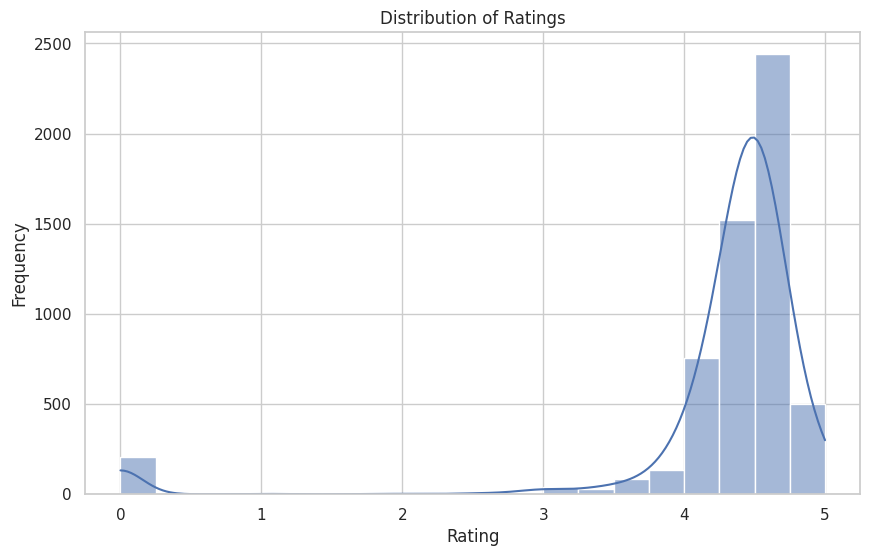

In [14]:
# Plot distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(books_df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

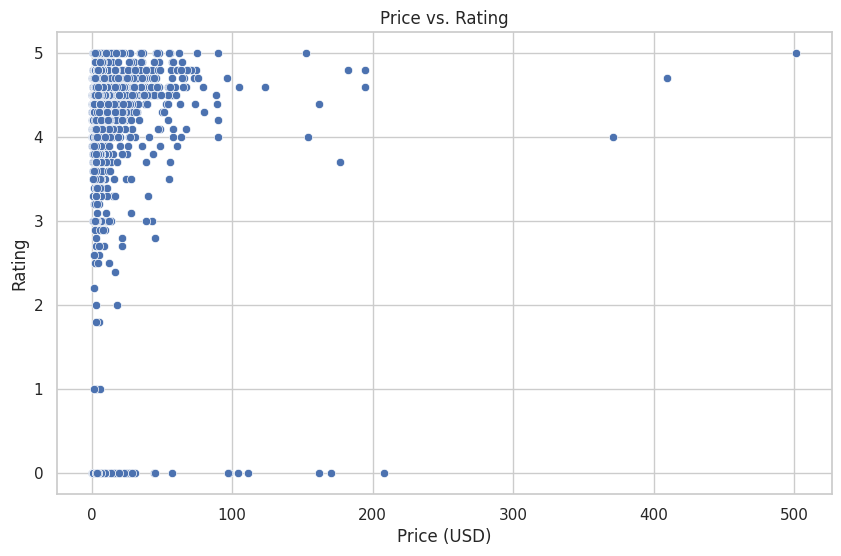

In [15]:
# Plot relationship between price and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_USD', y='Rating', data=books_df)
plt.title('Price vs. Rating')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.show()

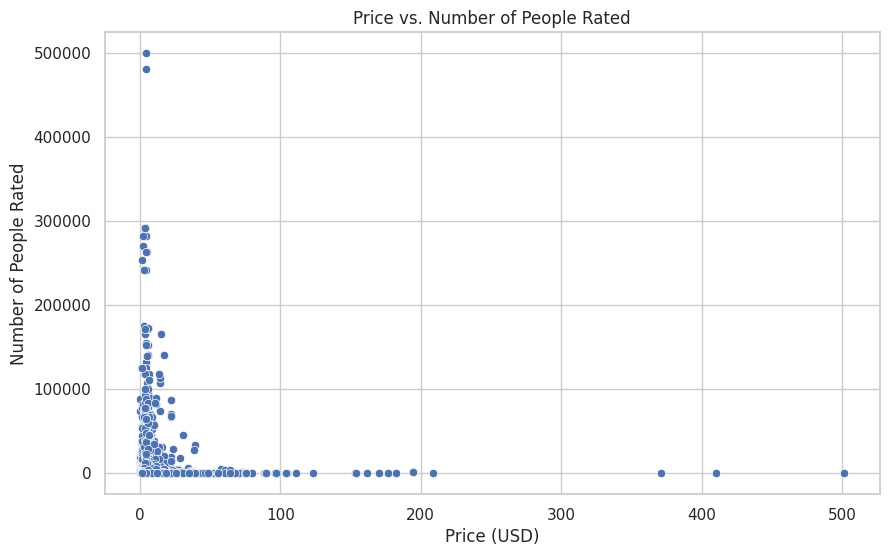

In [16]:
# Plot relationship between price and number of people rated
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_USD', y='No. of People rated', data=books_df)
plt.title('Price vs. Number of People Rated')
plt.xlabel('Price (USD)')
plt.ylabel('Number of People Rated')
plt.show()

In [17]:
# Calculate the average price of books
average_price = books_df['Price_USD'].mean()

# Print the average price
print("Average Price of Books: ${:.2f}".format(average_price))

Average Price of Books: $7.46


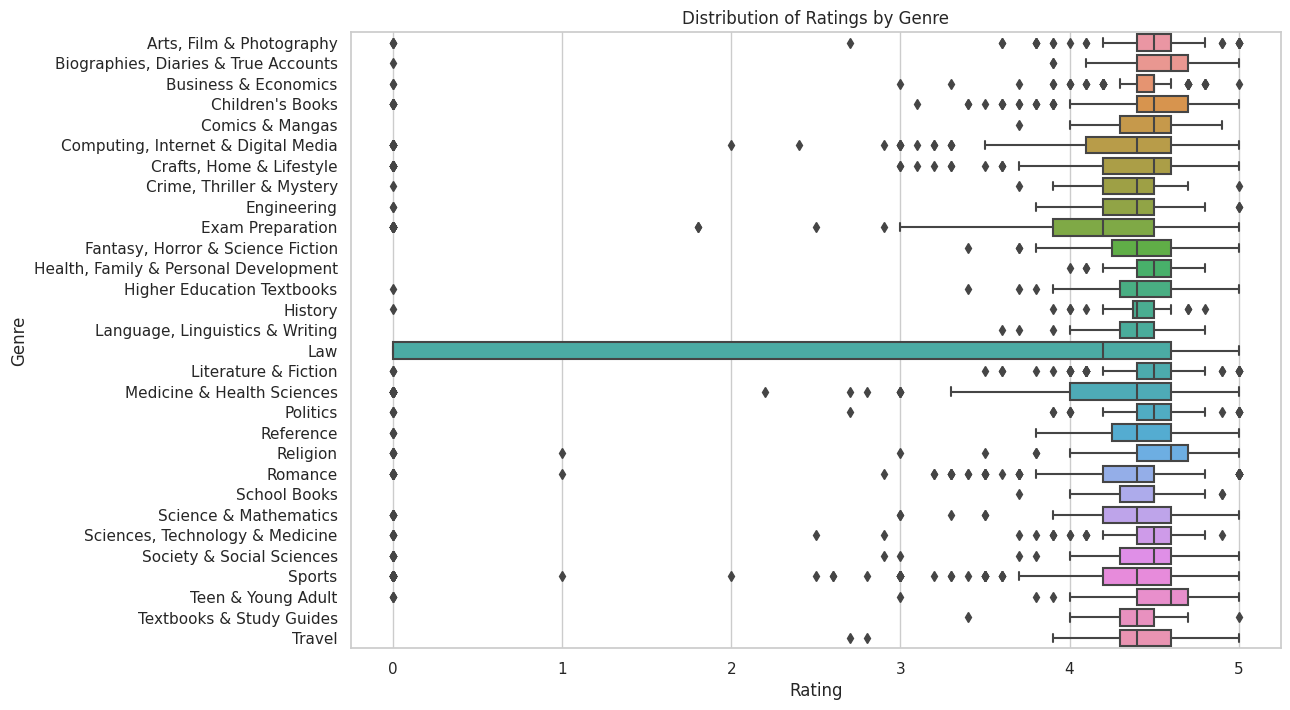

In [18]:
# Boxplot of Ratings by Genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Rating', y='Main Genre', data=books_df, orient='h')
plt.title('Distribution of Ratings by Genre')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.show()

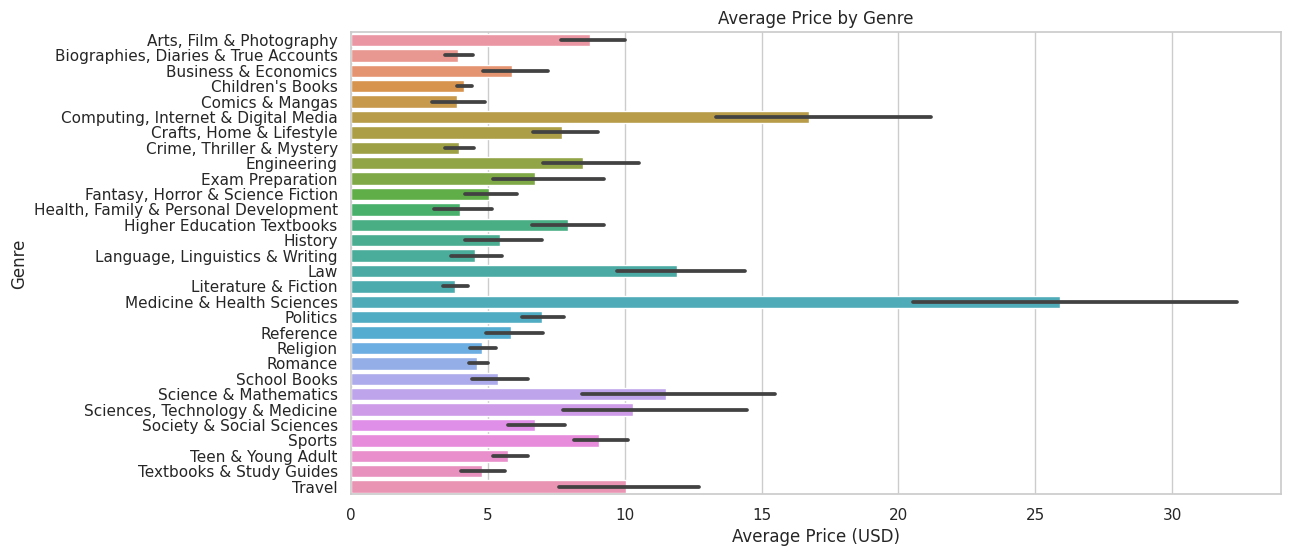

In [19]:
# Barplot of Average Price by Genre
plt.figure(figsize=(12, 6))
sns.barplot(x='Price_USD', y='Main Genre', data=books_df, estimator=np.mean)
plt.title('Average Price by Genre')
plt.xlabel('Average Price (USD)')
plt.ylabel('Genre')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


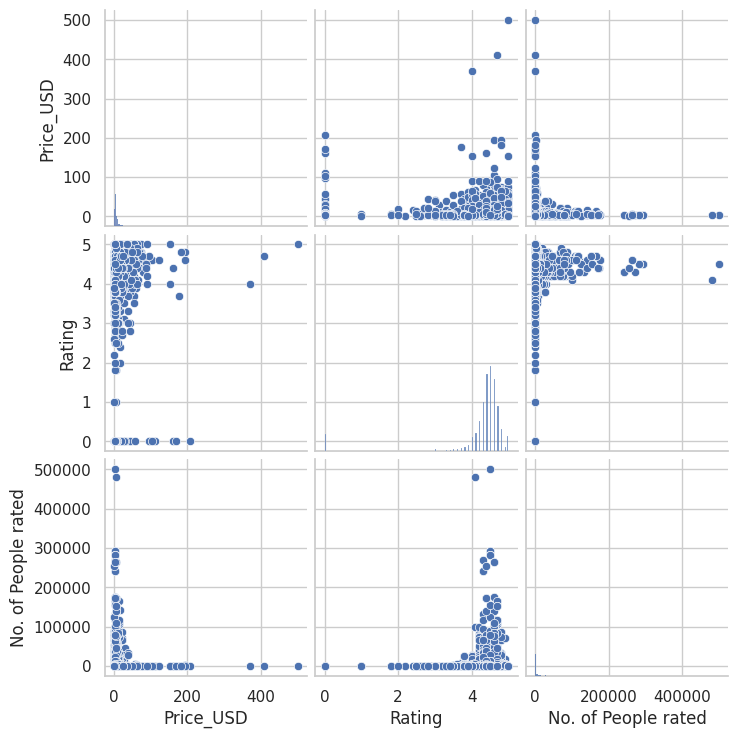

In [20]:
# Pairplot of Numerical Variables
sns.pairplot(books_df[['Price_USD', 'Rating', 'No. of People rated']])
plt.show()

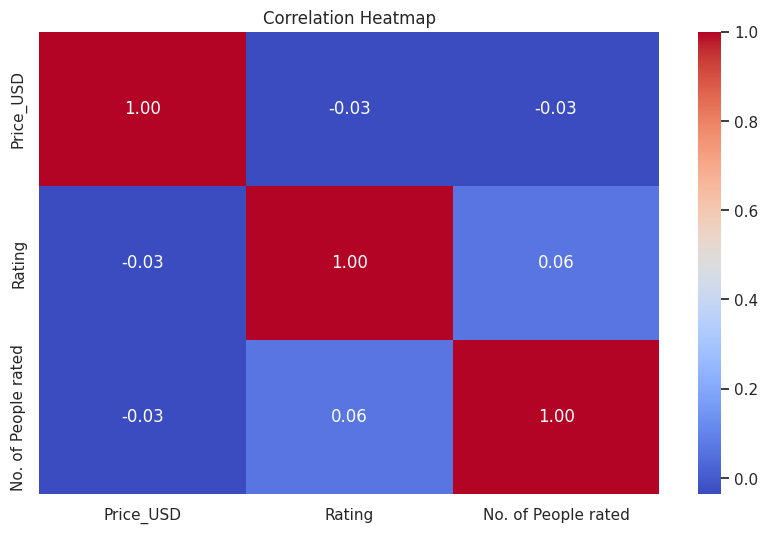

In [21]:
# Heatmap of Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(books_df[['Price_USD', 'Rating', 'No. of People rated']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Combine all book titles into a single string
all_titles = ' '.join(books_df['Title'])

# Combine all genres into a single string
all_genres = ' '.join(books_df['Main Genre'])

# Define additional stopwords to exclude common words that may not add value to the visualization
additional_stopwords = {'Edition', 'Volume', 'Series', 'Book'}

# Update the stopwords set with the additional stopwords
stopwords = set(STOPWORDS).union(additional_stopwords)

# Generate a word cloud for book titles
wordcloud_titles = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(all_titles)

# Plotting the word cloud for book titles
plt.figure(figsize=(10, 5), dpi=300)
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Book Titles')
plt.show()

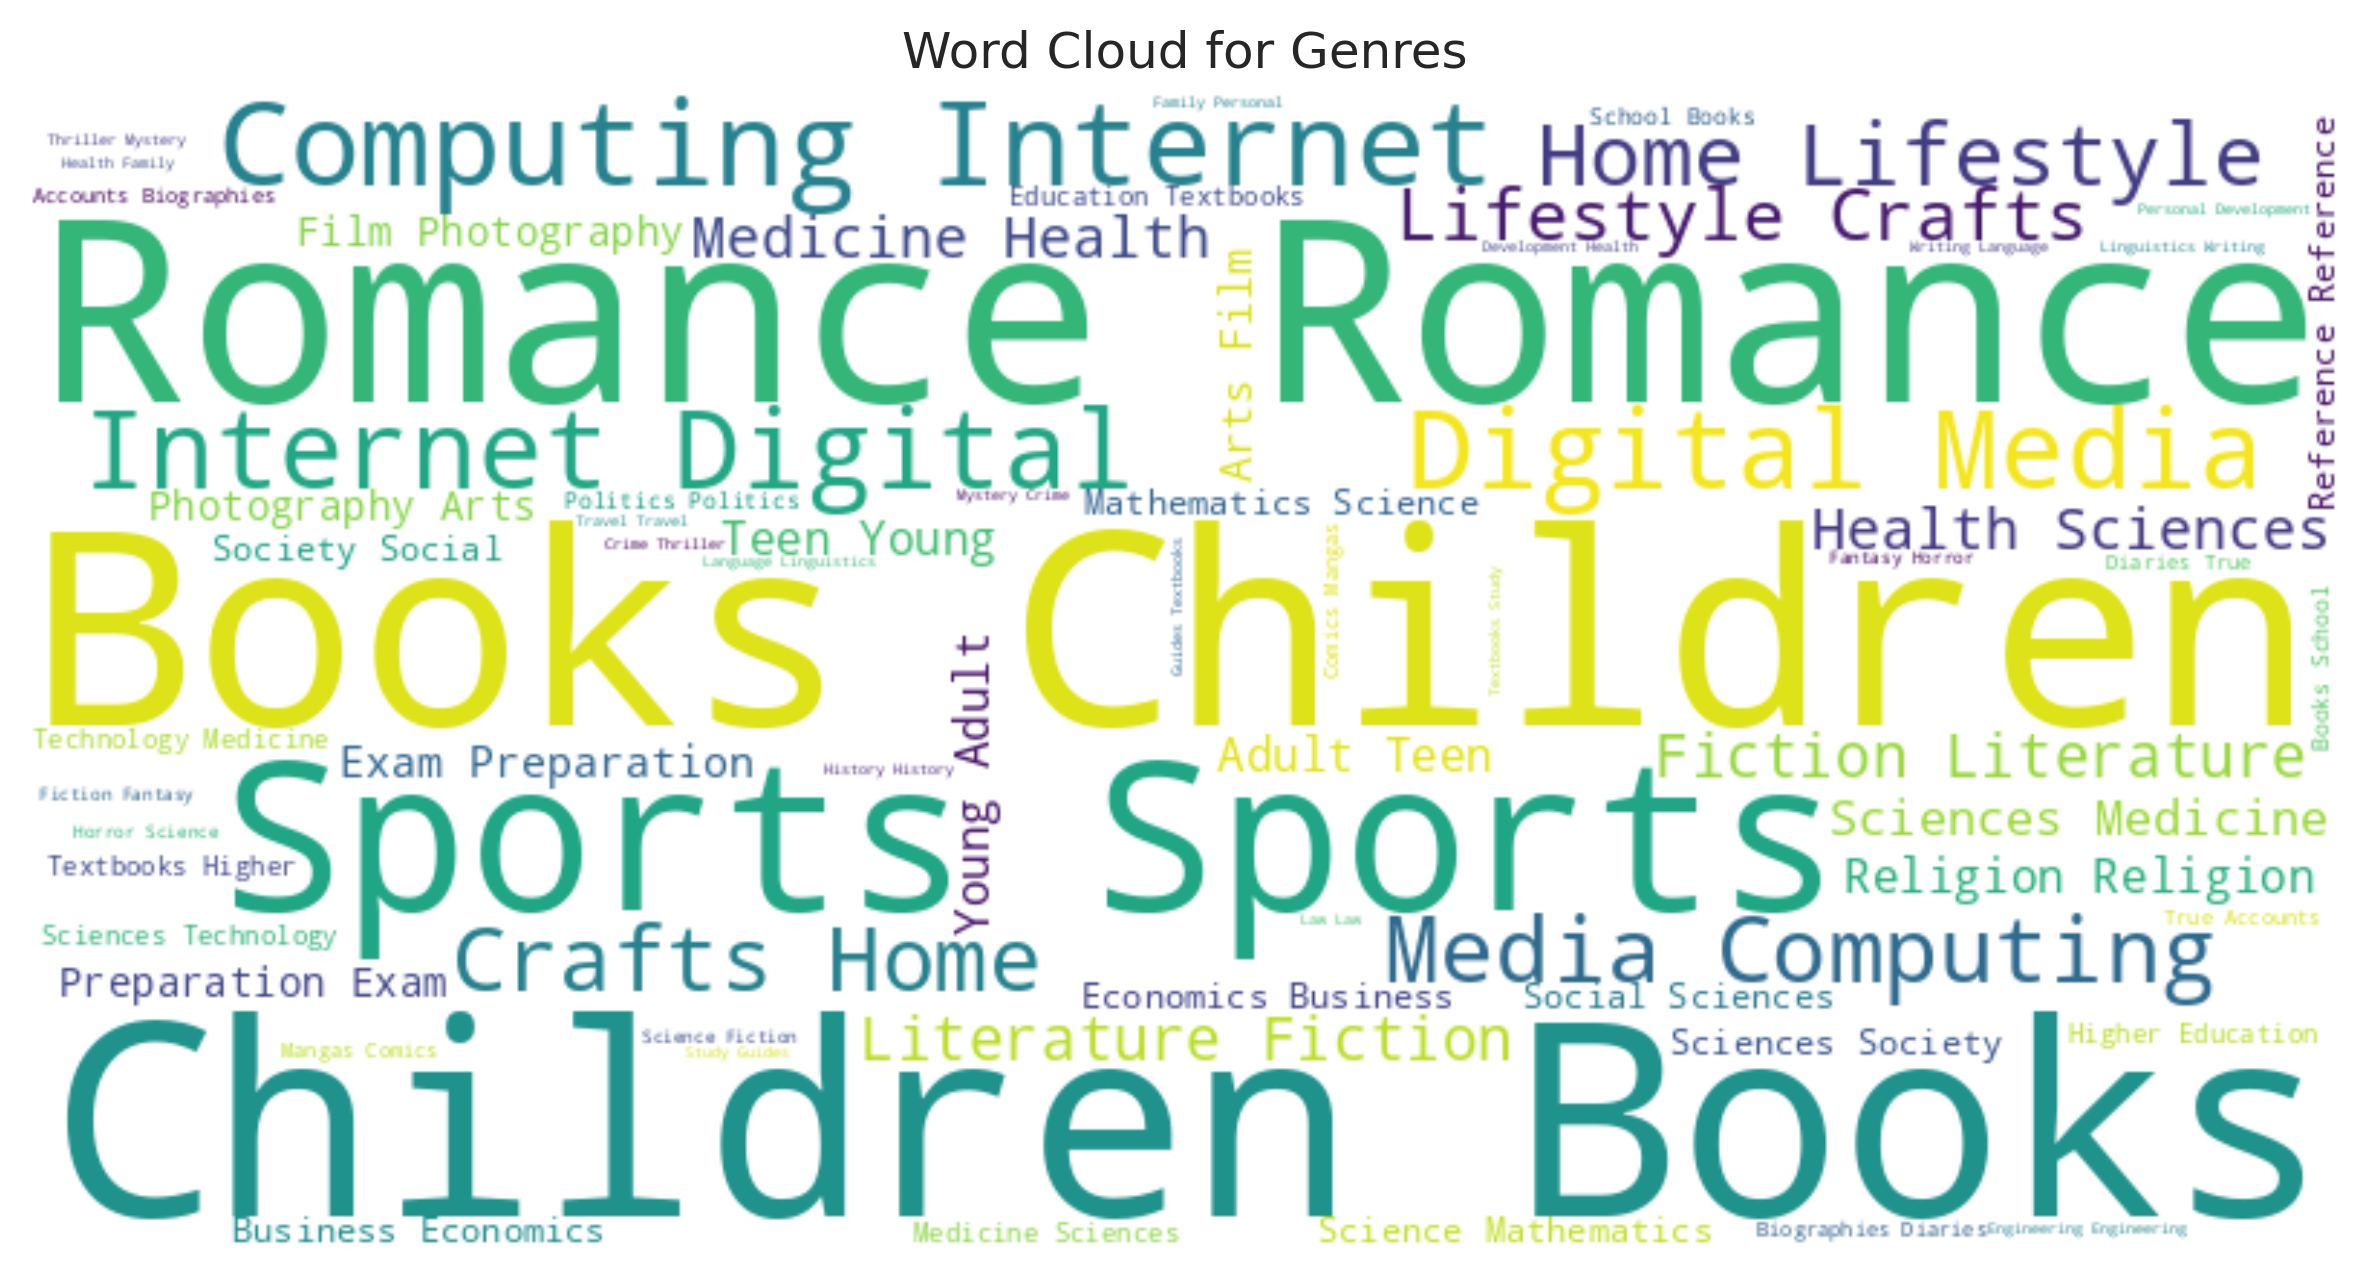

In [23]:
# Generate a word cloud for genres
wordcloud_genres = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(all_genres)

# Plotting the word cloud for genres
plt.figure(figsize=(10, 5), dpi=300)
plt.imshow(wordcloud_genres, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Genres')
plt.show()

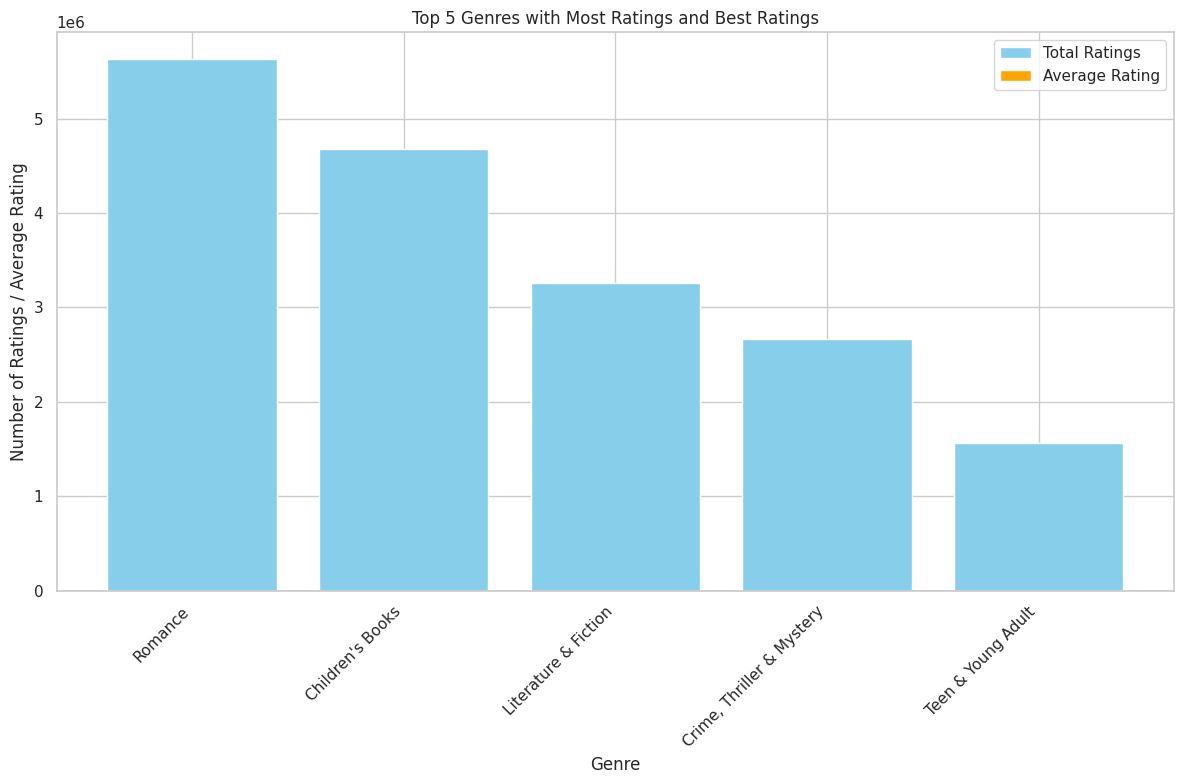

In [25]:
# Group by genre and calculate total number of ratings and average rating for each genre
genre_ratings = books_df.groupby('Main Genre').agg({'No. of People rated': 'sum', 'Rating': 'mean'}).reset_index()

# Sort the genres by total number of ratings and average rating in descending order
top_genres_ratings = genre_ratings.sort_values(by=['No. of People rated', 'Rating'], ascending=False).head(5)

# Plotting the graph
plt.figure(figsize=(12, 8))
plt.bar(top_genres_ratings['Main Genre'], top_genres_ratings['No. of People rated'], color='skyblue', label='Total Ratings')
plt.bar(top_genres_ratings['Main Genre'], top_genres_ratings['Rating'], color='orange', label='Average Rating')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings / Average Rating')
plt.title('Top 5 Genres with Most Ratings and Best Ratings')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

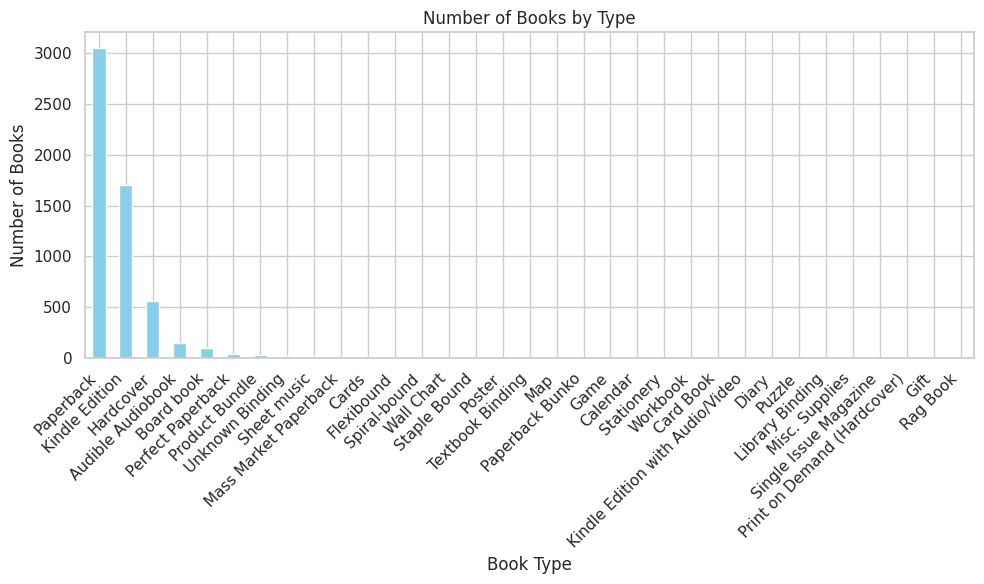

In [26]:
import matplotlib.pyplot as plt

# Count the number of books in each type
type_counts = books_df['Type'].value_counts()

# Sort the counts in descending order
type_counts_sorted = type_counts.sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
type_counts_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Book Type')
plt.ylabel('Number of Books')
plt.title('Number of Books by Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Ok, so now we know that Paperback is the most popular format, followed by Kindle, Hardcover and Audio. 


Now I want to make a combined score of the books with the highst rating and the highest amount of ratings. This way we can find the top books from the top genres. Let's get started :D

In [27]:
# Calculate the combined score
books_df['Combined Score'] = books_df['Rating'] * books_df['No. of People rated']

# Display the DataFrame with the combined score
print(books_df)

                                                  Title                Author  \
0                 the complete novel of sherlock holmes    Arthur Conan Doyle   
1     black holes (l) : the reith lectures [paperbac...       Stephen Hawking   
2                                       the kite runner       Khaled Hosseini   
3     greenlights: raucous stories and outlaw wisdom...   Matthew McConaughey   
4     the science of storytelling: why stories make ...            Will Storr   
...                                                 ...                   ...   
7923  insight guides poland (travel guide with free ...  Insight Travel Guide   
7924              lonely planet india 19 (travel guide)     Anirban Mahapatra   
7925  eyewitness travel phrase book french (ew trave...                    DK   
7926             lonely planet australia (travel guide)           Andrew Bain   
7927  political map of india latest map of india wit...    Wonder House Books   

                    Main Ge

In [28]:
# Group the DataFrame by the "Author" column and calculate the sum of the combined scores
top_authors = books_df.groupby('Author')['Combined Score'].sum().reset_index()

# Sort the authors by their combined scores in descending order
top_authors = top_authors.sort_values(by='Combined Score', ascending=False)

# Print the top authors
print("Top Authors with the Best Combined Score:")
print(top_authors.head(10))

Top Authors with the Best Combined Score:
                 Author  Combined Score
1442       J.K. Rowling       6088777.0
709      Colleen Hoover       5097493.7
2988      Sarah J. Maas       4662102.6
153    Alex Michaelides       2724826.7
1259      George Orwell       2614449.7
1184    Freida McFadden       2356929.5
872         Delia Owens       2250535.5
1182    Fredrik Backman       2213063.6
1527        Jeff Kinney       2204719.2
3581  Yuval Noah Harari       2133307.9


In [29]:
import matplotlib.pyplot as plt

# Define function to get top 3 unique books for each genre
def top_3_unique_books_by_genre(genre):
    genre_books = books_df[books_df['Main Genre'] == genre]
    
    # Sort the genre books by 'Combined Score' in descending order and select the top 3
    top_books = genre_books.sort_values(by='Combined Score', ascending=False).head(3)
    
    # If there are less than 3 unique books, add the next top book from the original list
    while len(top_books) < 3:
        next_top_book = genre_books[~genre_books['Title'].isin(top_books['Title'])].iloc[0]
        top_books = top_books.append(next_top_book)
    
    return top_books

In [30]:
# Get top 3 unique books for each genre
childrens_books_top3 = top_3_unique_books_by_genre("Children's Books")
romance_top3 = top_3_unique_books_by_genre("Romance")
literature_fiction_top3 = top_3_unique_books_by_genre("Literature & Fiction")

/tmp/ipykernel_33/3544626236.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


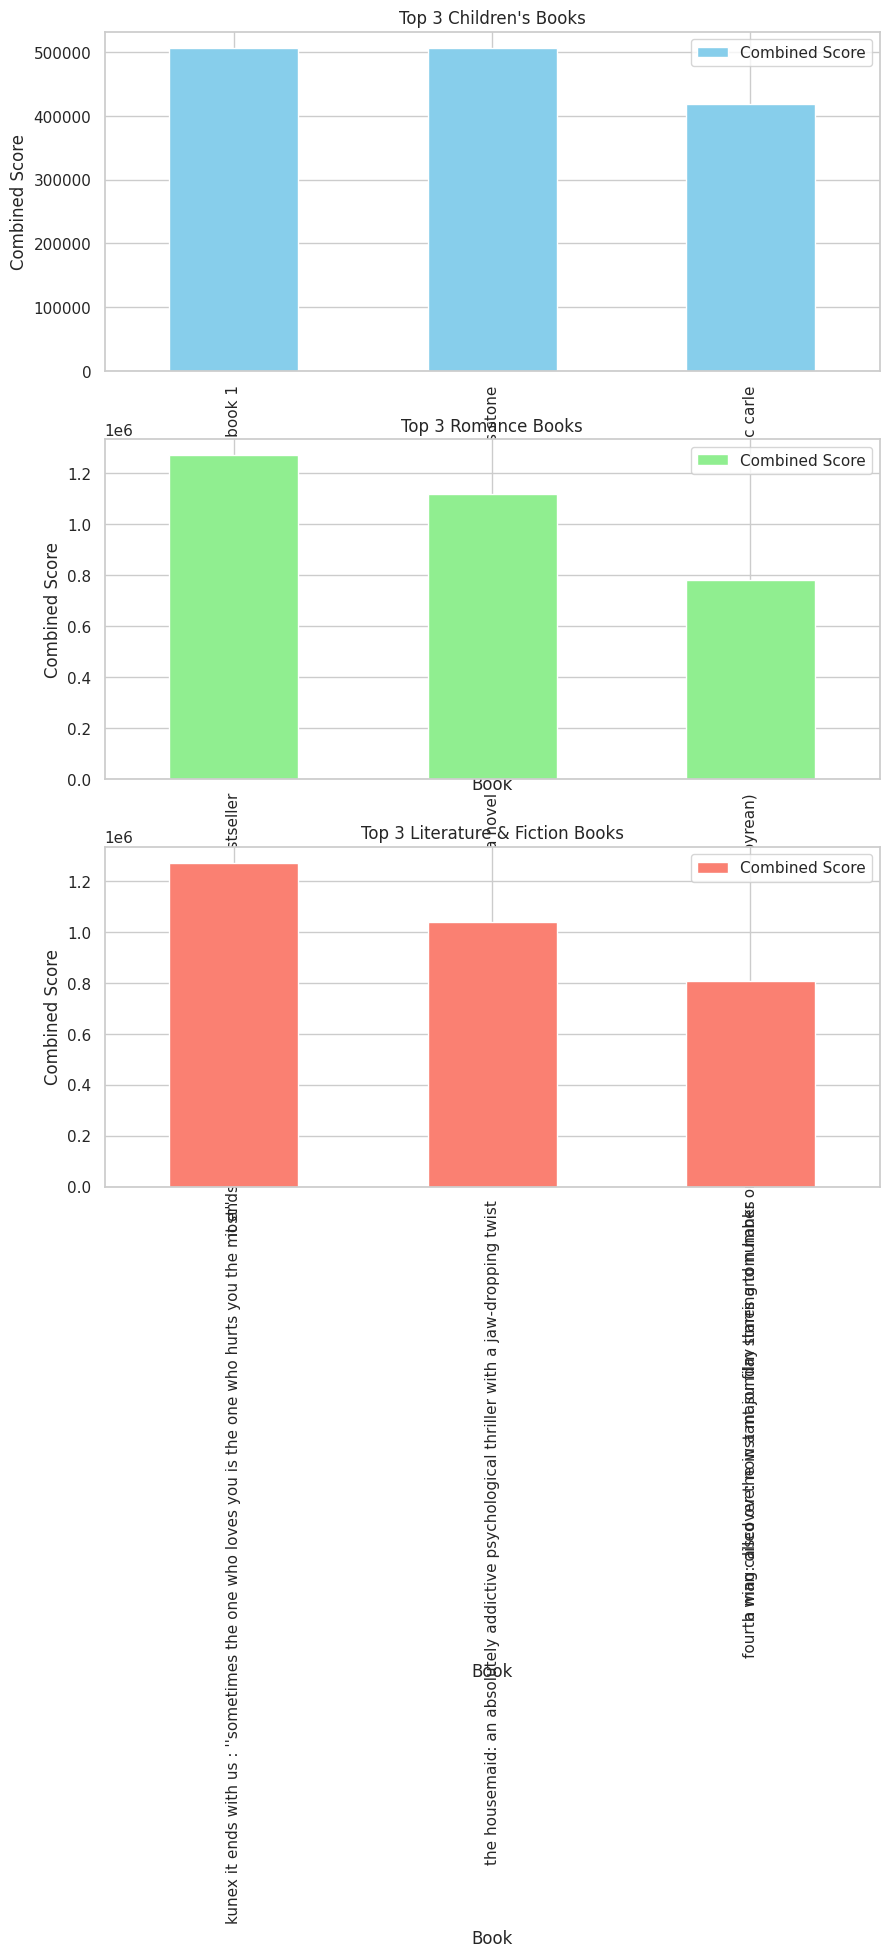

In [31]:
# Plotting the top 3 books from each genre
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot for Children's Books
childrens_books_top3.plot(kind='bar', x='Title', y='Combined Score', ax=axes[0], color='skyblue')
axes[0].set_title("Top 3 Children's Books")
axes[0].set_xlabel('Book')
axes[0].set_ylabel('Combined Score')

# Plot for Romance Books
romance_top3.plot(kind='bar', x='Title', y='Combined Score', ax=axes[1], color='lightgreen')
axes[1].set_title("Top 3 Romance Books")
axes[1].set_xlabel('Book')
axes[1].set_ylabel('Combined Score')

# Plot for Literature & Fiction Books
literature_fiction_top3.plot(kind='bar', x='Title', y='Combined Score', ax=axes[2], color='salmon')
axes[2].set_title("Top 3 Literature & Fiction Books")
axes[2].set_xlabel('Book')
axes[2].set_ylabel('Combined Score')

plt.tight_layout()
plt.show()

In [32]:
# Filter books belonging to the "Romance" genre
romance_books = books_df[books_df['Main Genre'] == "Romance"]

# Select top 5 unique books based on the combined score
top_romance_books = romance_books.sort_values(by='Combined Score', ascending=False).head(5)

# Print the top romance books
print("Top Romance Books:")
print(top_romance_books[['Title', 'Author', 'Rating', 'No. of People rated', 'Combined Score']])

Top Romance Books:
                                                  Title          Author  \
5560  it ends with us: the emotional #1 sunday times...  Colleen Hoover   
5544                          reminders of him: a novel  Colleen Hoover   
5558  fourth wing: discover the instant sunday times...  Rebecca Yarros   
5874  things we never got over: the tiktok bestselle...      Lucy Score   
5604                           a court of mist and fury   Sarah J. Maas   

      Rating  No. of People rated  Combined Score  
5560     4.5             282384.0       1270728.0  
5544     4.4             254361.0       1119188.4  
5558     4.7             165909.0        779772.3  
5874     4.4             173438.0        763127.2  
5604     4.7             152676.0        717577.2  


In [33]:
# Filter books belonging to the "Children's Books" genre
children_books = books_df[books_df['Main Genre'] == "Children's Books"]

# Select top 5 unique books based on the combined score
top_children_books = children_books.sort_values(by='Combined Score', ascending=False).head(5)

# Print the top children's books
print("Top Children's Books:")
print(top_children_books[['Title', 'Author', 'Rating', 'No. of People rated', 'Combined Score']])

Top Children's Books:
                                                  Title        Author  Rating  \
985    harry potter and the philosopher's stone, book 1  J.K. Rowling     4.7   
902            harry potter and the philosopher's stone  J.K. Rowling     4.7   
452   the very hungry caterpillar [board book] eric ...    Eric Carle     4.7   
1145       harry potter and the deathly hallows, book 7  J.K. Rowling     4.8   
967                harry potter and the deathly hallows  J.K. Rowling     4.8   

      No. of People rated  Combined Score  
985              107802.0        506669.4  
902              107802.0        506669.4  
452               88951.0        418069.7  
1145              87027.0        417729.6  
967               87027.0        417729.6  


In [34]:
# Filter books belonging to the "Literature & Fiction" genre
literature_fiction_books = books_df[books_df['Main Genre'] == "Literature & Fiction"]

# Select top 5 unique books based on the combined score
top_5_literature_fiction = literature_fiction_books.sort_values(by='Combined Score', ascending=False).head(5)

# Print the top fiction & literature
print("Top 5 Literature & Fiction Books:")
print(top_5_literature_fiction[['Title', 'Author', 'Rating', 'No. of People rated', 'Combined Score']])

Top 5 Literature & Fiction Books:
                                                  Title           Author  \
3610  kunex it ends with us : ''sometimes the one wh...   Colleen Hoover   
3616  the housemaid: an absolutely addictive psychol...  Freida McFadden   
3794  a man called ove: now a major film starring to...  Fredrik Backman   
3750                                   a man called ove  Fredrik Backman   
3833                        a court of thorns and roses    Sarah J. Maas   

      Rating  No. of People rated  Combined Score  
3610     4.5             282384.0       1270728.0  
3616     4.3             242023.0       1040698.9  
3794     4.6             175588.0        807704.8  
3750     4.6             175588.0        807704.8  
3833     4.4             171974.0        756685.6  


Ok so now we have the top 3 with their combined score of highest ratings and highest amount of ratings:

Top Genres:
1. Romance
2. Children's Books
3. Literature & Fiction

Top books in each of those genres:
- Romance:
1. It ends with us
2. Reminders of him
3. Fourth wing
- Children's books:
1. Harry Potter and the philosopher's stone
2. The very hungry caterpillar
3. Harry Potter and the deathly hallows
- Literature & Fiction:
1. The housemaid
2. A man called Ove
3. A court of thorns and roses

## Adding "Author Nationality" column
I've now got an idea of the top overall genres, books and authors. But now I'm curious about Indian authors and books written by Indian authors. So, I used ChatGPT to find the nationality of the authors by checking on their wikipedia pages. I then ran through it myself to check for errors, and then downloaded it into a csv file. Now, I'll connect it to our database so we can find the top Indian authors and the top books written by Indian authors.

In [35]:
import pandas as pd

# Read the CSV file into a DataFrame
author_nationality_df = pd.read_csv('/kaggle/input/author-nationalities-amazonbookdf/author_nationalities.csv')

# Split the "Author" column based on the comma separator
author_nationality_df[['Author', 'Author Nationality']] = author_nationality_df['Arthur Conan Doyle, United Kingdom'].str.split(',', n=1, expand=True)

# Drop the original "Arthur Conan Doyle, United Kingdom" column
author_nationality_df.drop(columns=['Arthur Conan Doyle, United Kingdom'], inplace=True)

# Print the resulting DataFrame
print(author_nationality_df.head())

                Author Author Nationality
0      Stephen Hawking     United Kingdom
1      Khaled Hosseini      United States
2  Matthew McConaughey      United States
3           Will Storr     United Kingdom
4         J.K. Rowling     United Kingdom


In [36]:
# Merge author nationality information into books_df
books_with_nationality_df = pd.merge(books_df, author_nationality_df, on='Author', how='left')

# Print the head of the merged DataFrame
print(books_with_nationality_df.head())

                                               Title               Author  \
0              the complete novel of sherlock holmes   Arthur Conan Doyle   
1  black holes (l) : the reith lectures [paperbac...      Stephen Hawking   
2                                    the kite runner      Khaled Hosseini   
3  greenlights: raucous stories and outlaw wisdom...  Matthew McConaughey   
4  the science of storytelling: why stories make ...           Will Storr   

                 Main Genre           Sub Genre            Type  Rating  \
0  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.4   
1  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.5   
2  Arts, Film & Photography  Cinema & Broadcast  Kindle Edition     4.6   
3  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.6   
4  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.5   

   No. of People rated  Price_USD  Combined Score Author Nationality  
0              

In [42]:
# Filter the DataFrame to include only Indian authors
indian_authors_df = author_nationality_df[author_nationality_df['Author Nationality'] == ' India']

# Merge the filtered DataFrame with the main books DataFrame on the "Author" column
indian_books_df = pd.merge(books_df, indian_authors_df, on='Author', how='inner')

# Calculate the combined score
indian_books_df['Combined Score'] = indian_books_df['Rating'] * indian_books_df['No. of People rated']

# Group the DataFrame by author and calculate the sum of the combined scores
top_indian_authors = indian_books_df.groupby('Author')['Combined Score'].sum().reset_index()

# Sort the authors by combined score in descending order
top_indian_authors = top_indian_authors.sort_values(by='Combined Score', ascending=False)

# Print the top 10 authors from India with the highest combined scores
print("Top 10 Authors from India with Combined Score:")
print(top_indian_authors.head(10))

Top 10 Authors from India with Combined Score:
                         Author  Combined Score
95                  Murty Sudha        236961.8
170                 Sudha Murty        200363.6
109       Paramahansa Yogananda        190942.7
144                 Ruskin Bond        188650.2
36                Chetan Bhagat        177123.6
37   Chitra Banerjee Divakaruni         82185.3
97                        NCERT         78544.8
15              Arihant Experts         67093.7
121         Rabindranath Tagore         62339.1
85               Mahatma Gandhi         58957.2


In [43]:
# Filter the DataFrame to include only Indian authors
indian_authors_df = author_nationality_df[author_nationality_df['Author Nationality'] == ' India']

# Merge the filtered DataFrame with the main books DataFrame on the "Author" column
indian_books_df = pd.merge(books_df, indian_authors_df, on='Author', how='inner')

# Calculate the combined score
indian_books_df['Combined Score'] = indian_books_df['Rating'] * indian_books_df['No. of People rated']

# Sort the DataFrame by combined score in descending order
top_books_by_indian_authors = indian_books_df.sort_values(by='Combined Score', ascending=False).head(10)

# Print the top 10 books by Indian authors with the highest combined scores
print("Top 10 Books by Indian Authors with Combined Score:")
print(top_books_by_indian_authors[['Title', 'Author', 'Rating', 'No. of People rated', 'Combined Score']])

Top 10 Books by Indian Authors with Combined Score:
                                                 Title                 Author  \
201                               the girl in room 105          Chetan Bhagat   
140  grandma's bag of stories: collection of 20+ il...            Murty Sudha   
116  grandma's bag of stories: special edition: an ...            Sudha Murty   
123                                  the blue umbrella            Ruskin Bond   
42              the story of my experiments with truth         Mahatma Gandhi   
283                         great stories for children            Ruskin Bond   
34                             autobiography of a yogi  Paramahansa Yogananda   
37   three thousand stitches: ordinary people, extr...            Murty Sudha   
200                                           400 days          Chetan Bhagat   
40          autobiography of a yogi (complete edition)  Paramahansa Yogananda   

     Rating  No. of People rated  Combined Score  
201  

# Data Visualization Infographic
Now that I've done a quick EDA, I will create two infographics (vertical and horizontal) with some key elements. My background in UX design is coming in handy now! My manager appreciates when I create dashboards like this for our internal data analyses because it makes it easier to share to stakeholders via Slack or put into presentations, especially for those without a data background as it's concise, visual, and easy to understand without getting too much into numbers.

Also sorry for the bad quality, it won't commit this version unless I lower it.


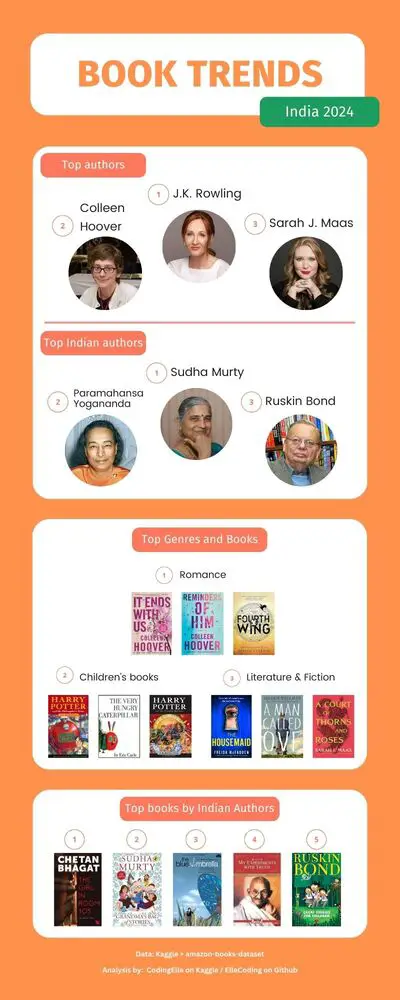
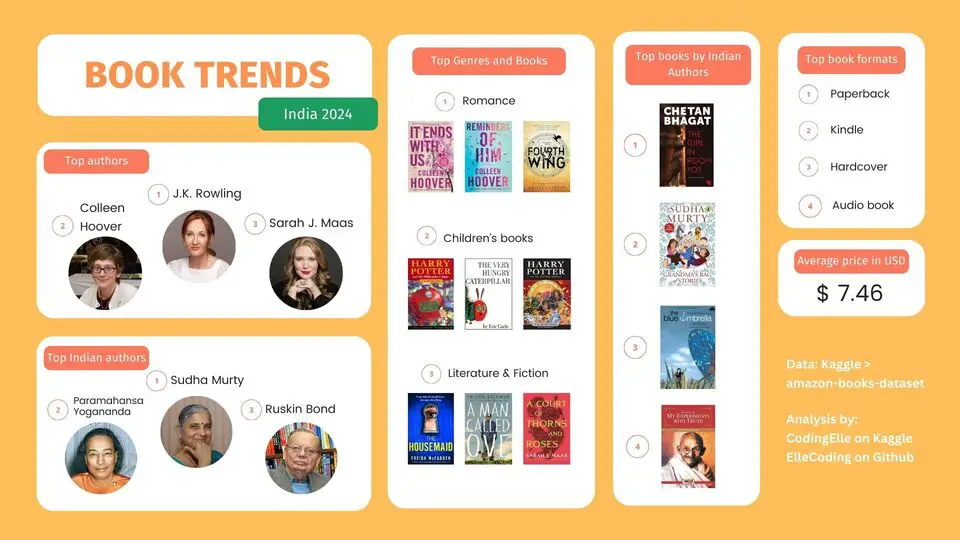

# Tableau Dashboard
Although infographics can be great to translate the data to stakeholders without a data analysis background, an interactive dashboard is also useful when working with ongoing data. So now, I'll download the data and create a dashboard on Tableau.

In [39]:
# Download csv file
books_df.to_csv('books_data.csv', index=False)

# Download csv file
books_with_nationality_df.to_csv('books_with_nationality_df.csv', index=False)

Here are some screenshots of the Tableau dashboard :)

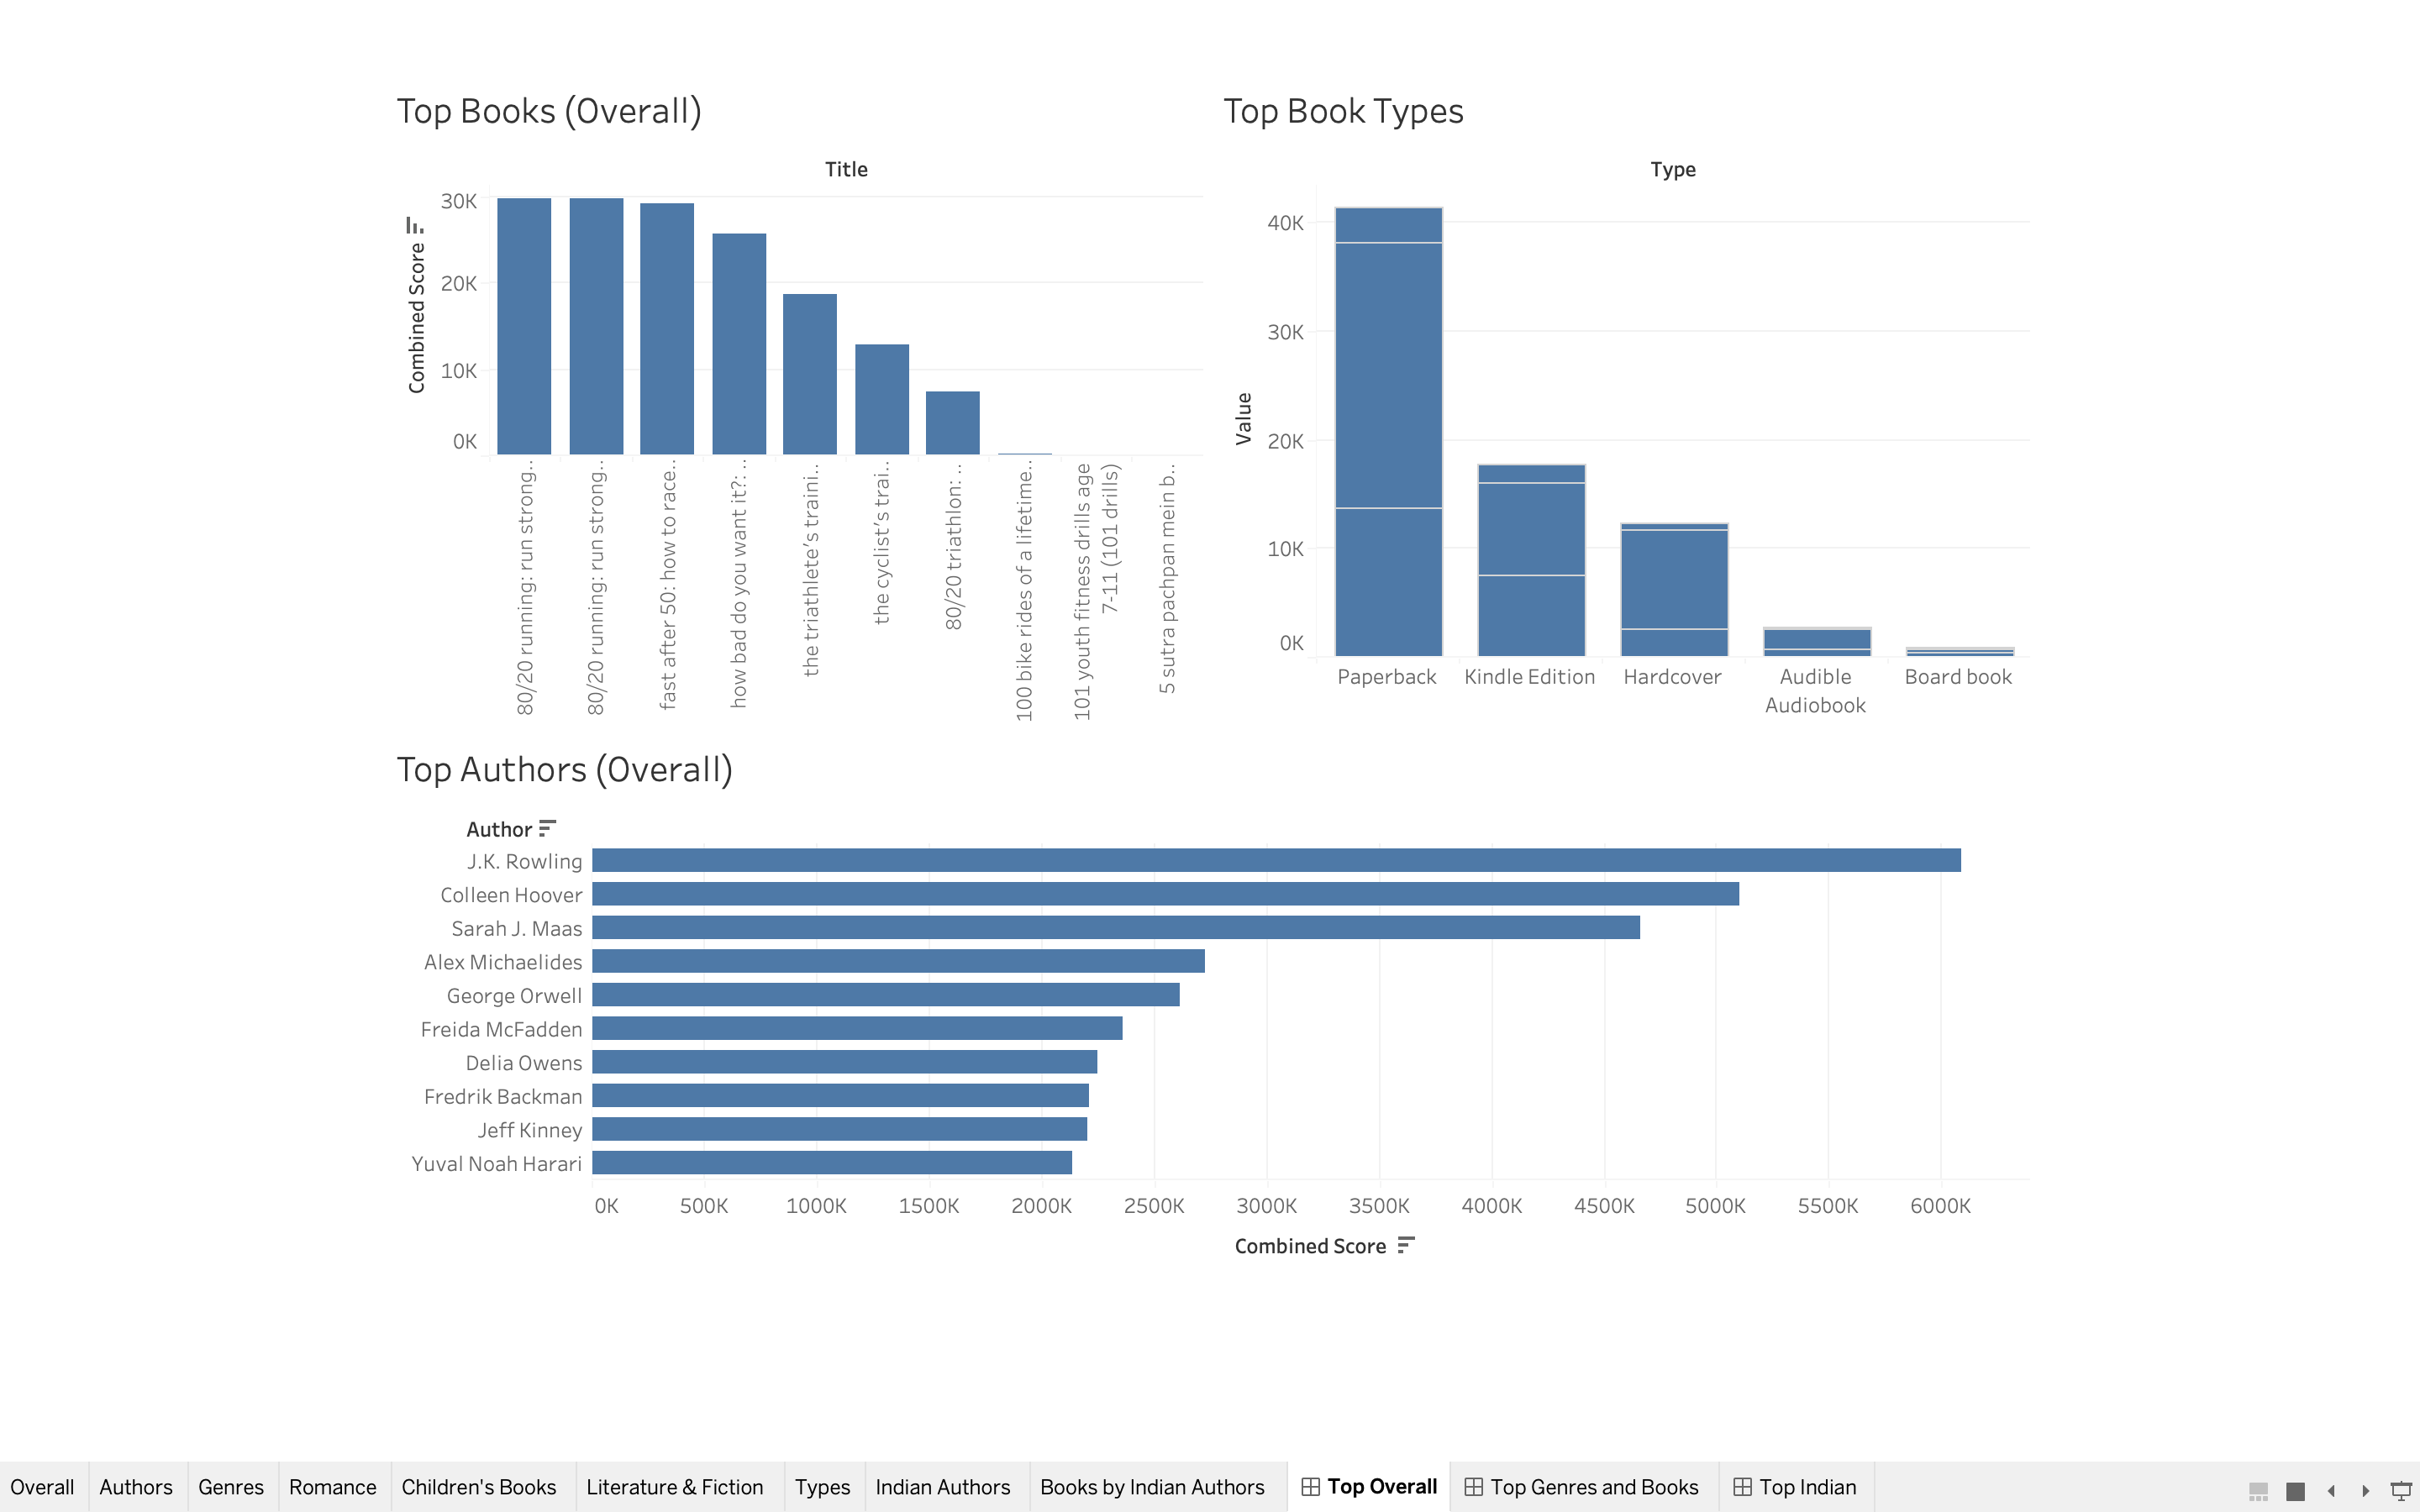
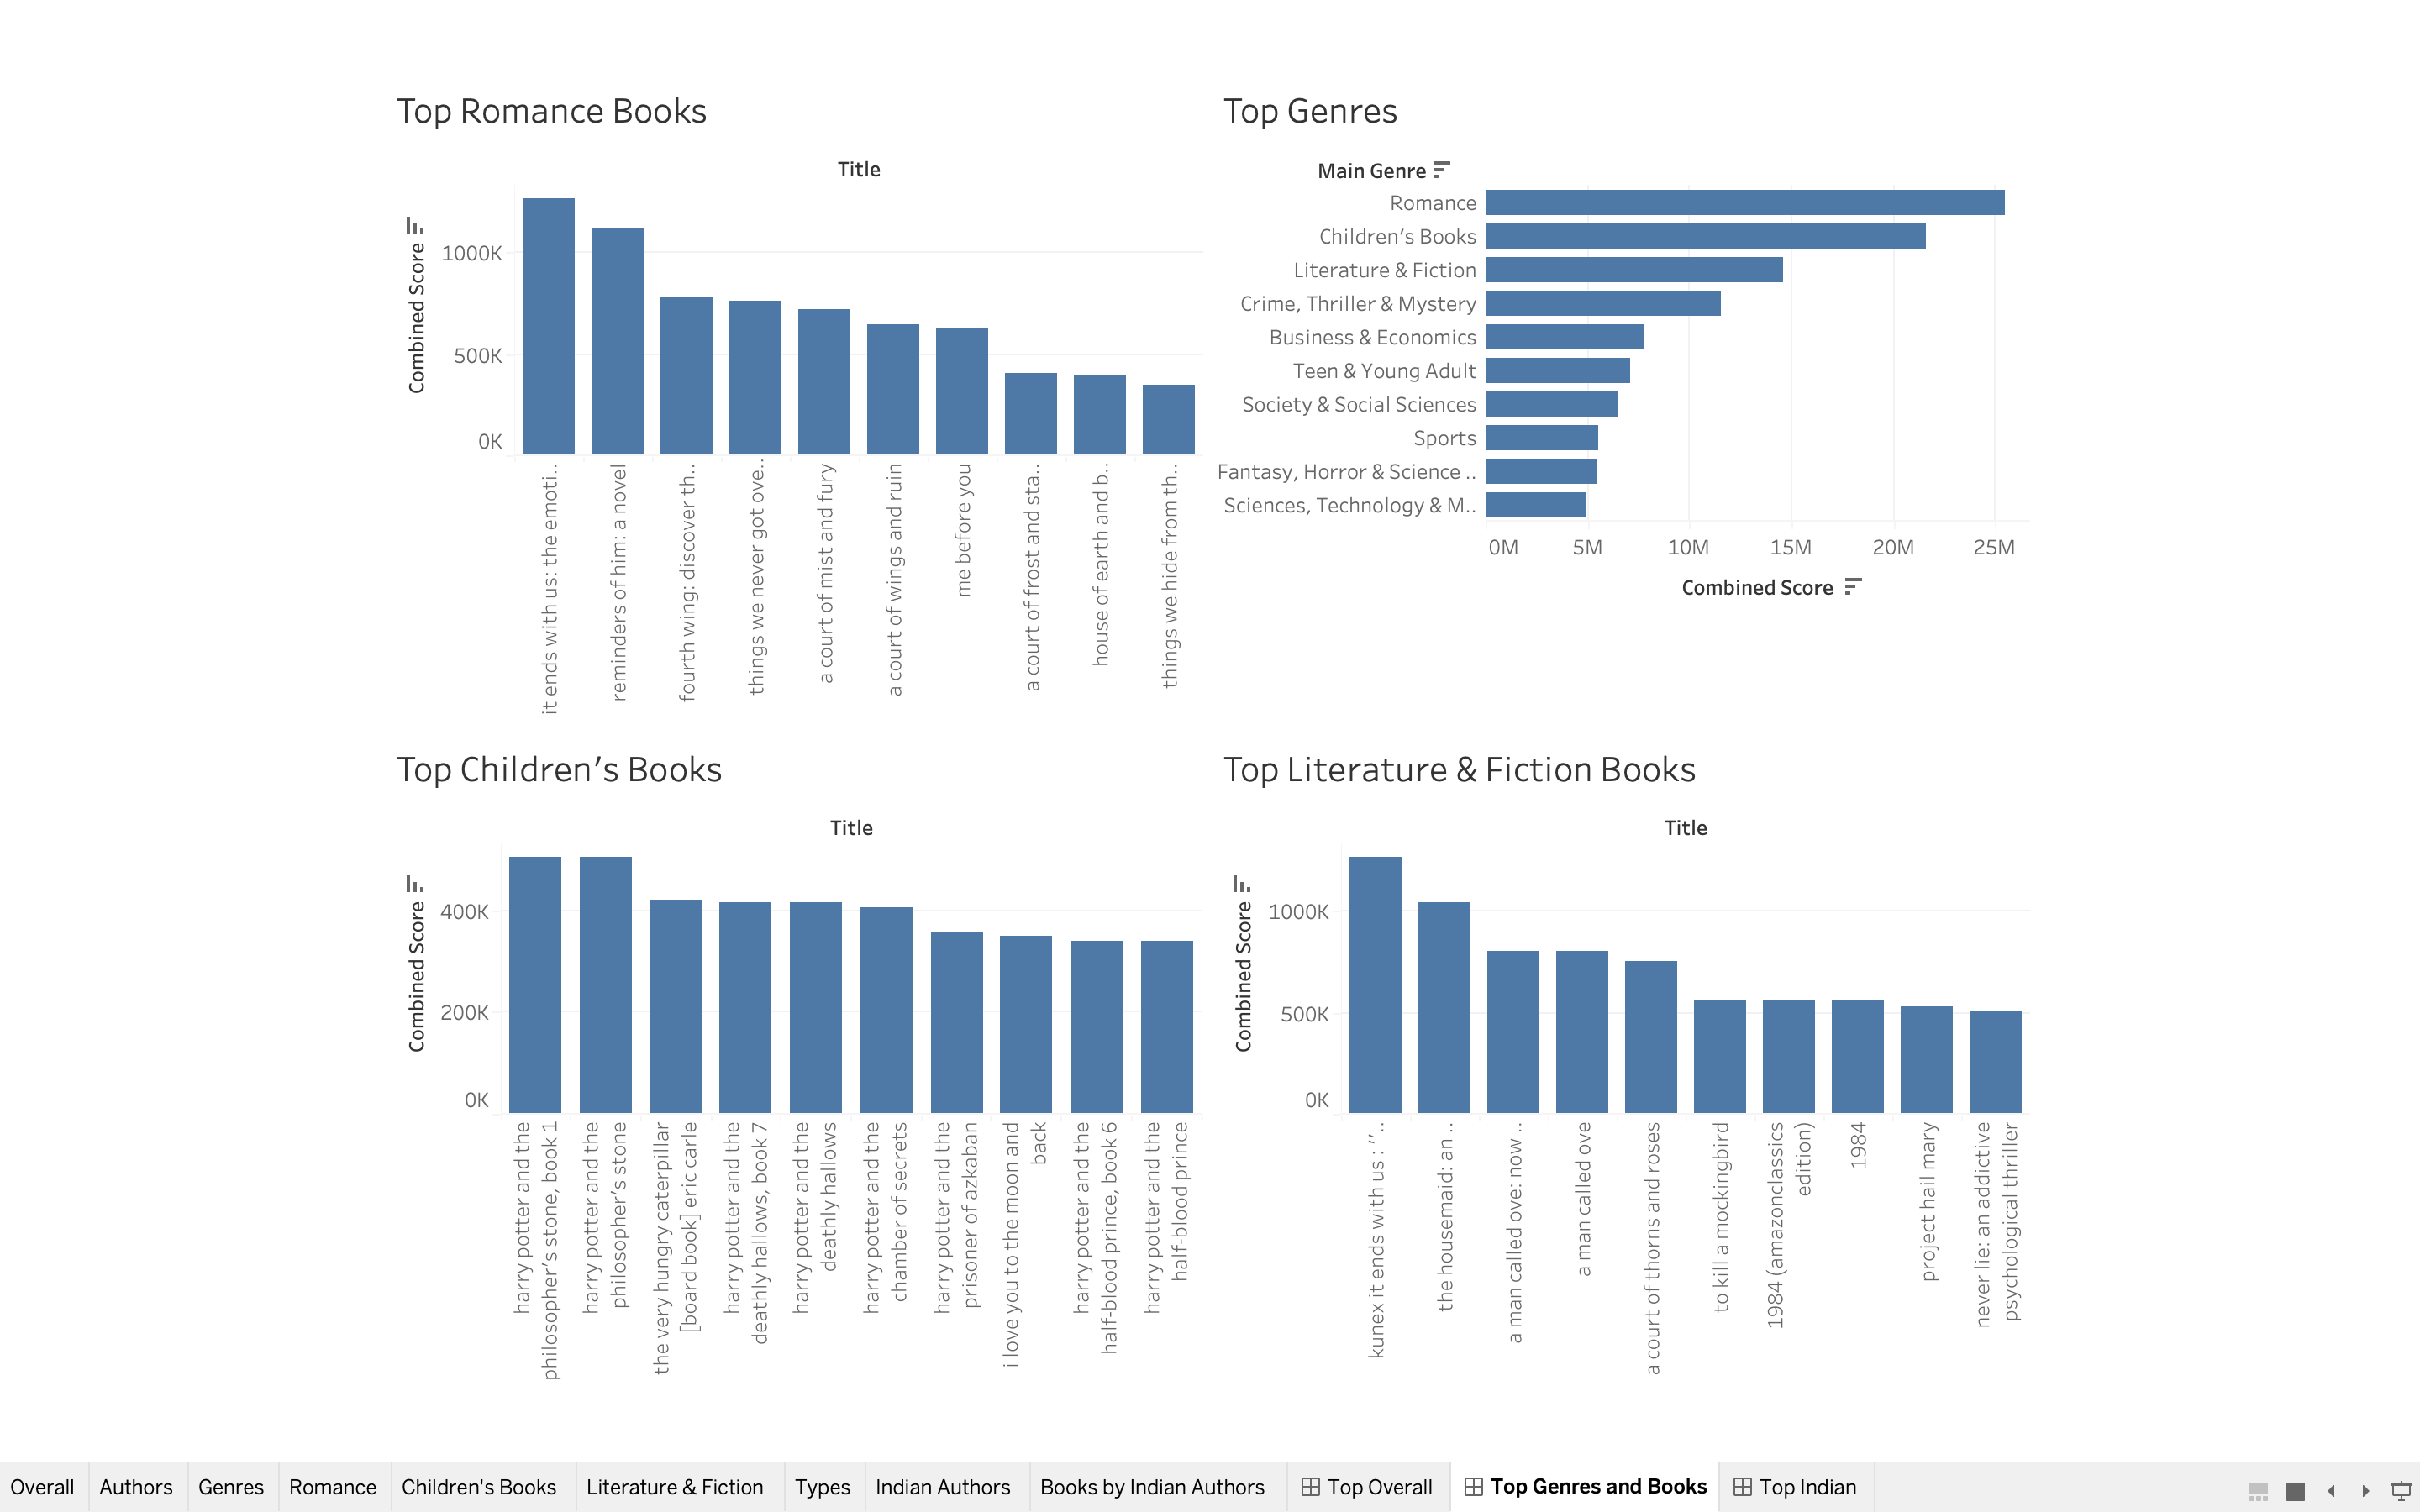
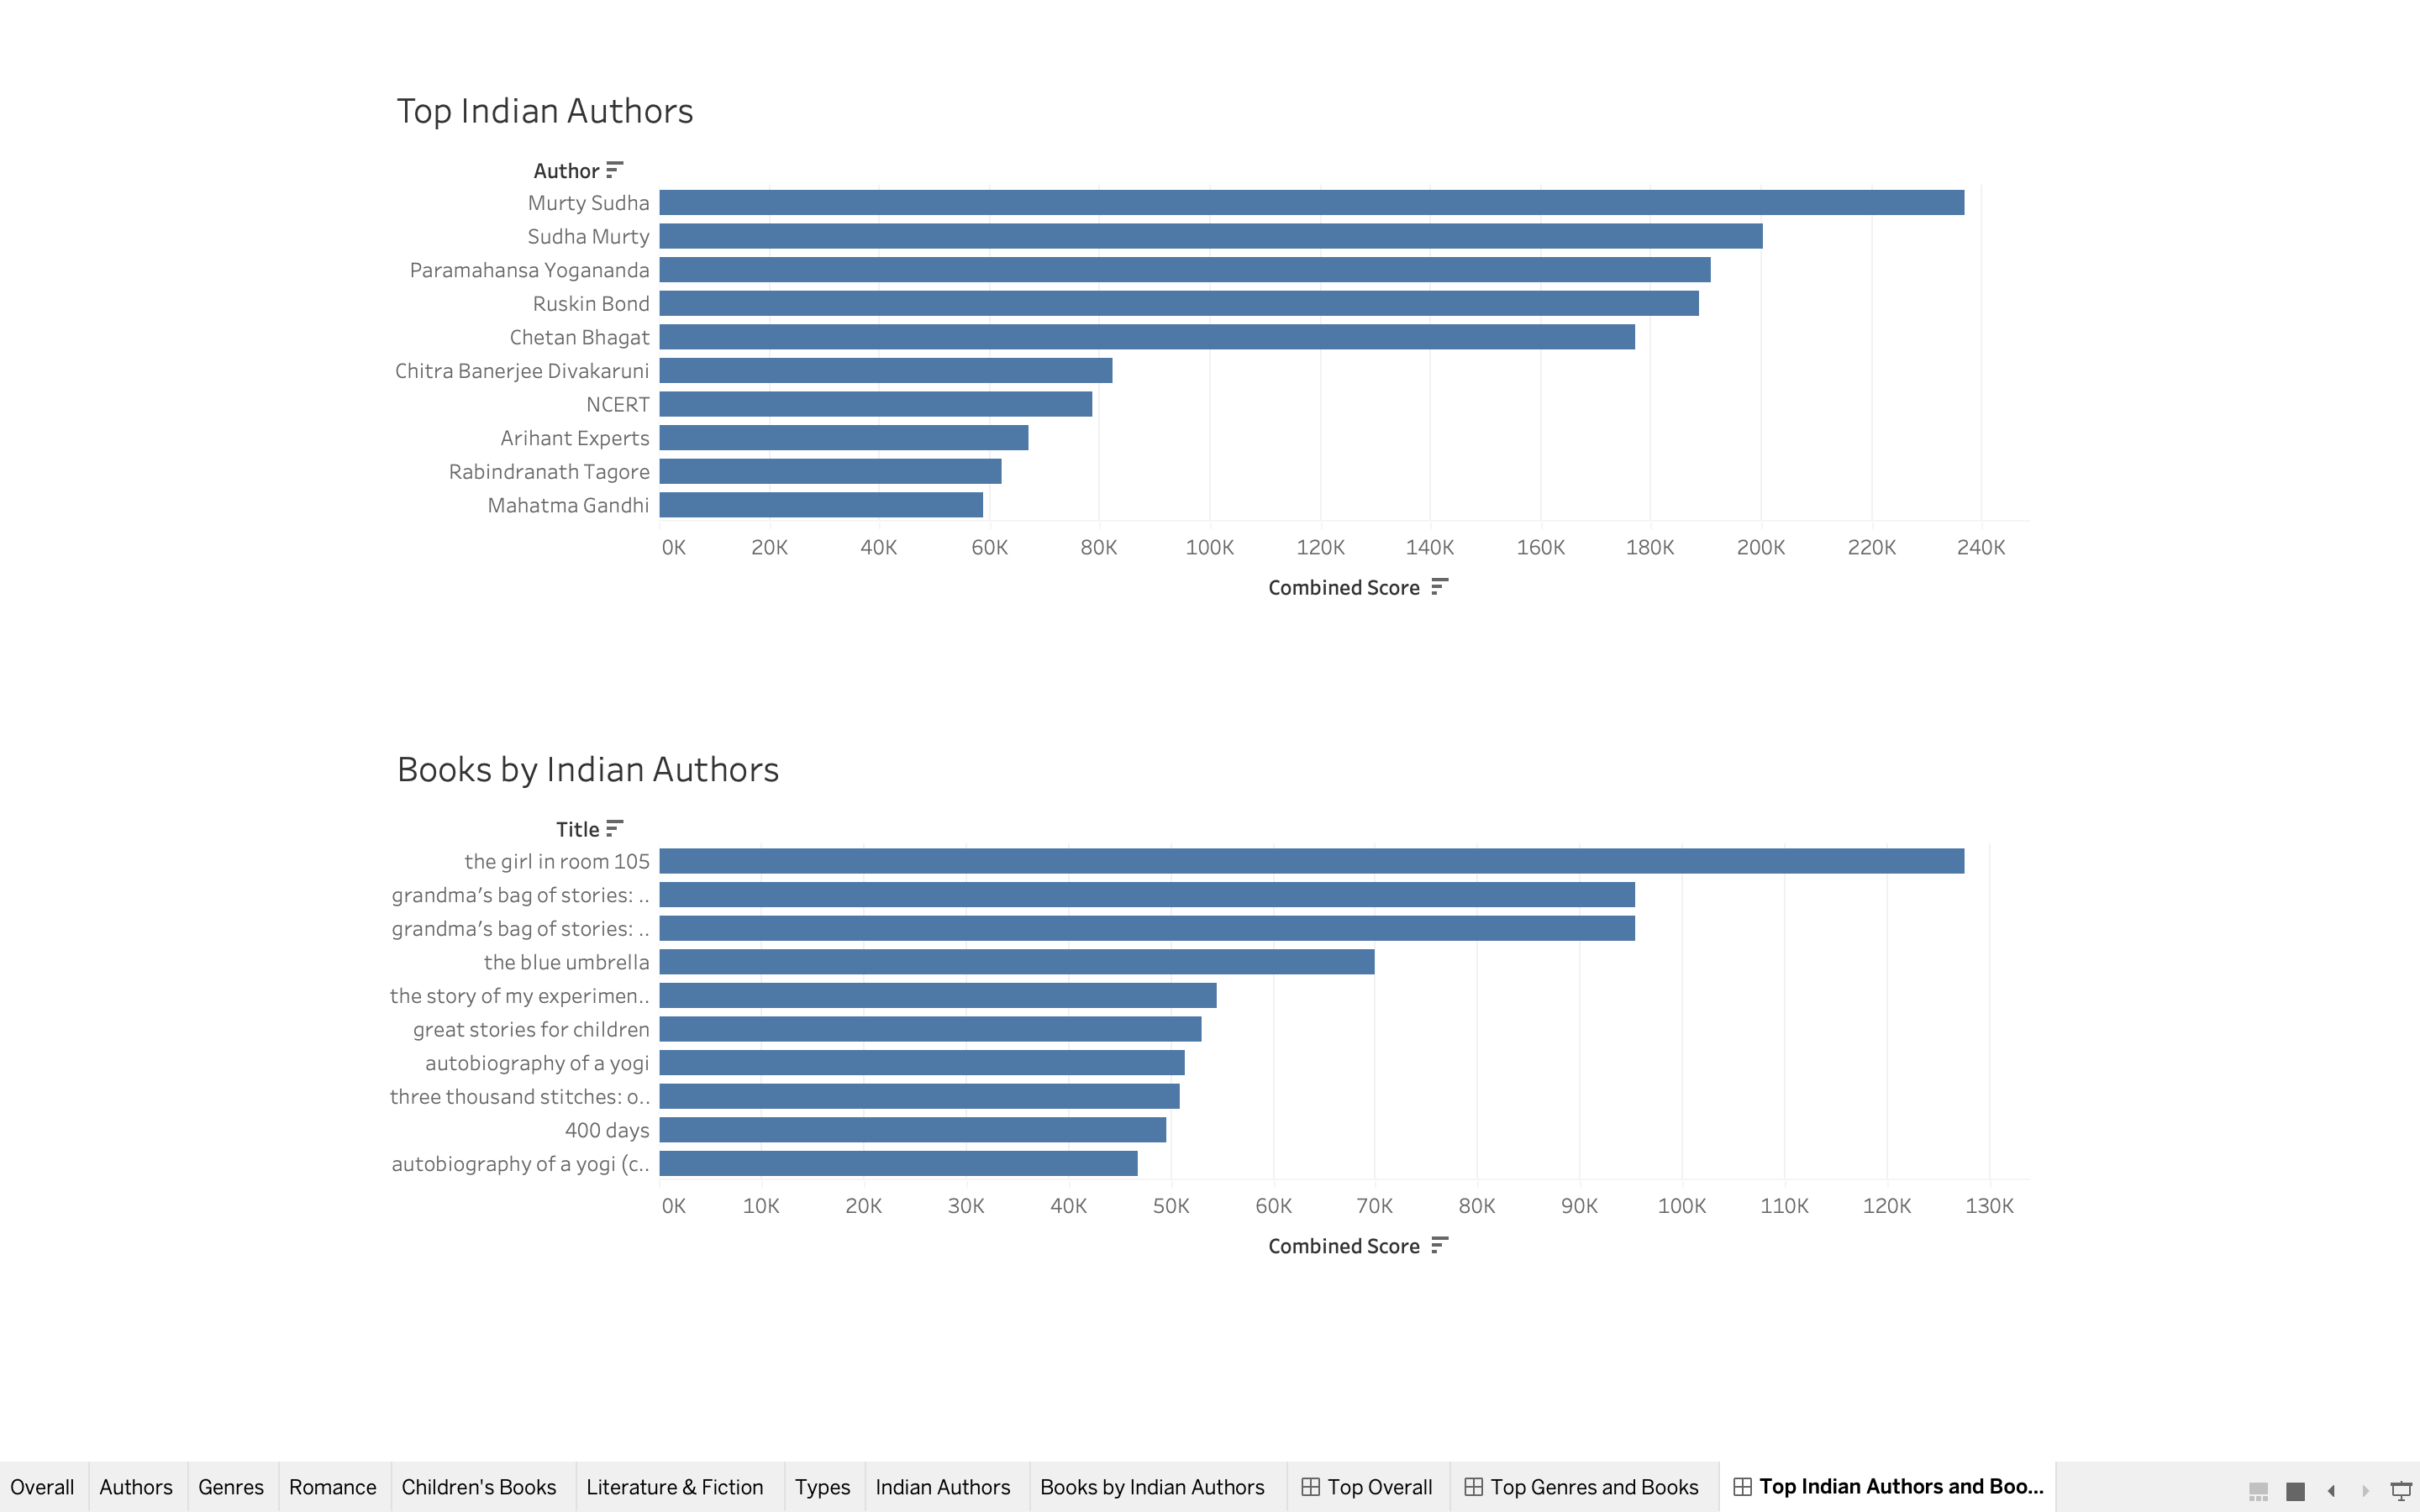